In [1]:
# 경고 메시지가 안나오게..
import warnings
warnings.filterwarnings('ignore')

# 기본
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

# KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 교차 검증 함수
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 학습 데이터와 검증데이터로 나누는 함수
from sklearn.model_selection import train_test_split

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가함수
from sklearn.metrics import accuracy_score

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 딥러닝
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

from keras.utils import np_utils
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

# 다중분류를 위한 핫-윈 인코더
from keras.utils import to_categorical

# 저장된 딥러닝 모델을 복구하는 함수
from keras.models import load_model

# epoch마다 모델을 저장하는 함수
from keras.callbacks import ModelCheckpoint

# 더이상 성능 향상이 이루어지지 않는다면 조기 중단시킬 수 있는 함수
from keras.callbacks import EarlyStopping

# 저장
import pickle

# 시간 모듈
import time

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

In [2]:
from keras.datasets import mnist

In [3]:
# gpu 사용 초기화 및 할당
gpus= tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

# 시드값 설정
np.random.seed(3)
tf.random.set_seed(3)

In [4]:
# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
# 2차원으로 되어 있는 이미지 한 장의 데이터를 CNN에 적합한 행렬 형태로 변환
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [6]:
# 0~1로의 조정한다
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [8]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [9]:
# 결과 데이터 원핫 인코딩
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [10]:
# CNN설정
# Conv2d : 케라스에서 컨볼루션 레이어를 추가하는 함수
# Maxpooling2D : 데이터 축소
# Dropout : 은닉층의 노드를 임의로 꺼주는 것(과적합 방지)
# Flatten : 2차원 배열을 1차원으로 변환

model = Sequential()

# 입력층 + 은닉층 : Conv2d
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
# 은닉층 : Conv2d
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# 은닉층 : Maxpooling
model.add(MaxPooling2D(pool_size=2))
# 은닉층 : Dropout
model.add(Dropout(0.25))
# 은닉층 : Flatten
model.add(Flatten())
# 은닉층 : Dense
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# 출력층
model.add(Dense(10, activation='softmax'))

In [11]:
# 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# 저장 콜백
modelpath = 'models/{epoch}-{val_loss}.hdf5'
callback1 = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1,
                           save_best_only=True)
# 조기중단 콜백
callback2 = EarlyStopping(monitor='val_loss', patience=10)

In [13]:
# 학습
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                   epochs=30, batch_size=200, verbose=0,
                   callbacks=[callback1, callback2])



Epoch 00001: val_loss improved from inf to 0.05648, saving model to models\1-0.056481629610061646.hdf5

Epoch 00002: val_loss improved from 0.05648 to 0.04009, saving model to models\2-0.040091950446367264.hdf5

Epoch 00003: val_loss improved from 0.04009 to 0.03690, saving model to models\3-0.036903638392686844.hdf5

Epoch 00004: val_loss improved from 0.03690 to 0.03333, saving model to models\4-0.03332708775997162.hdf5

Epoch 00005: val_loss improved from 0.03333 to 0.03122, saving model to models\5-0.031221313402056694.hdf5

Epoch 00006: val_loss improved from 0.03122 to 0.03003, saving model to models\6-0.030028924345970154.hdf5

Epoch 00007: val_loss did not improve from 0.03003

Epoch 00008: val_loss improved from 0.03003 to 0.02966, saving model to models\8-0.029659874737262726.hdf5

Epoch 00009: val_loss did not improve from 0.02966

Epoch 00010: val_loss improved from 0.02966 to 0.02849, saving model to models\10-0.028494298458099365.hdf5

Epoch 00011: val_loss did not impro

In [17]:
# 정확도 확인
best_model = load_model('models/13-0.02483731135725975.hdf5')

best_model.evaluate(X_test, y_test)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.0248 - accuracy: 0.9924


0.9923999905586243

In [18]:
# 학습 데이터 오차
y_loss = history.history['loss']
y_loss

[0.2714160978794098,
 0.08919098973274231,
 0.06479200720787048,
 0.0559997633099556,
 0.043852660804986954,
 0.04131963849067688,
 0.03565919026732445,
 0.03264104574918747,
 0.02798859216272831,
 0.026778100058436394,
 0.023307854309678078,
 0.020771754905581474,
 0.022695934399962425,
 0.020711135119199753,
 0.01837371289730072,
 0.017112823203206062,
 0.017381533980369568,
 0.01487843319773674,
 0.014651895500719547,
 0.013557654805481434,
 0.013667321763932705,
 0.012895680032670498,
 0.013063380494713783]

In [19]:
# 검증 데이터 오차
y_vloss = history.history['val_loss']
y_vloss

[0.056481629610061646,
 0.040091950446367264,
 0.036903638392686844,
 0.03332708775997162,
 0.031221313402056694,
 0.030028924345970154,
 0.031471285969018936,
 0.029659874737262726,
 0.030485985800623894,
 0.028494298458099365,
 0.030161550268530846,
 0.025541353970766068,
 0.02483731135725975,
 0.0256898645311594,
 0.028609244152903557,
 0.028676651418209076,
 0.026551082730293274,
 0.027261357754468918,
 0.03012518584728241,
 0.029363729059696198,
 0.02903456799685955,
 0.032724373042583466,
 0.028740594163537025]

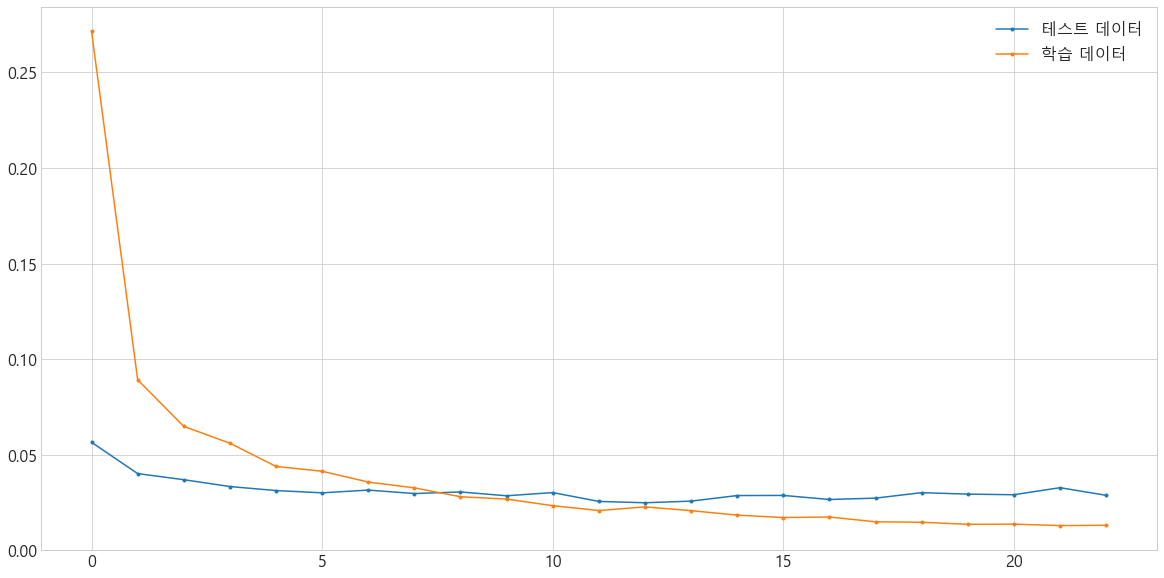

In [22]:
# 그래프

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', label='테스트 데이터')
plt.plot(x_len, y_loss, marker='.', label='학습 데이터')
plt.legend()
plt.show()